## Step 1: Reading and Understanding the Data

In [755]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [756]:
# Reading the data

df = pd.read_csv('day.csv')

In [757]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [758]:
# checking how many rows and columns we have

df.shape

(730, 16)

In [759]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [760]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [761]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [762]:
# Renaming columns for better readability

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [763]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [764]:
# removing duplicates

df.drop_duplicates(inplace=True)

In [765]:
#From below we can see that there are no duplicate values in the data set as the shape remains the same
df.shape

(730, 16)

In [766]:
# dropping the unwanted columns

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

## Step 2: Label encoding & visualization

In [767]:
# Encoding the weathersit column

df["weathersit"] = df["weathersit"].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Snow'})

In [768]:
# Encoding the weekday column

df["weekday"] = df["weekday"].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [769]:
# Encoding the month column

df["month"] = df["month"].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [770]:
# Encoding the year column

df["year"] = df["year"].map({0:2018, 1:2019})

In [771]:
# Encoding the season column

df["season"] = df["season"].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [772]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,2018,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

In [773]:
# function to create barplot related to categorical columns

def cat_column_vis(column):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.barplot(data=df,x=column,y='cnt')
    plt.subplot(1,2,2)
    sns.barplot(data=df,x=column,y='cnt', hue='year', palette='Set2')
    plt.show()

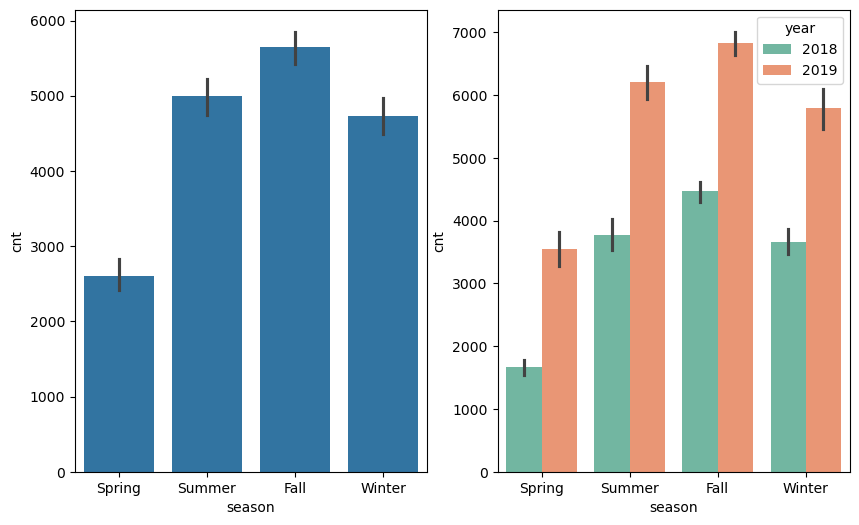

In [774]:
# plotting visualization for season column

cat_column_vis('season')

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

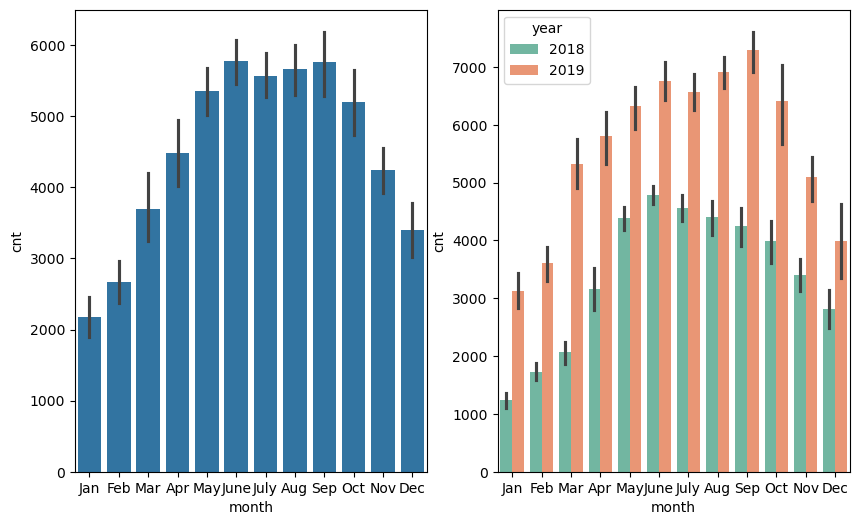

In [775]:
# plotting visualization for month column

cat_column_vis('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.
Number of booking for each month seems to have increased from 2018 to 2019.

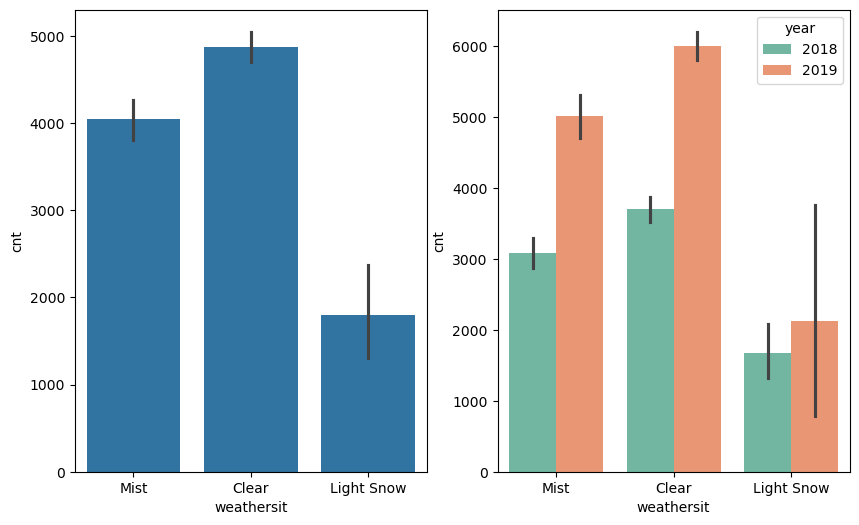

In [776]:
# plotting visualization for weathersit column

cat_column_vis('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

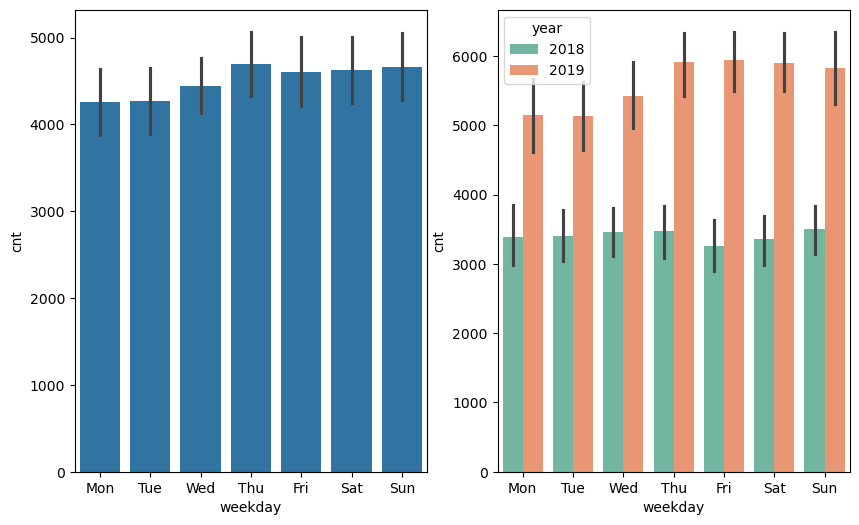

In [777]:
# plotting visualization for weekday column

cat_column_vis('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

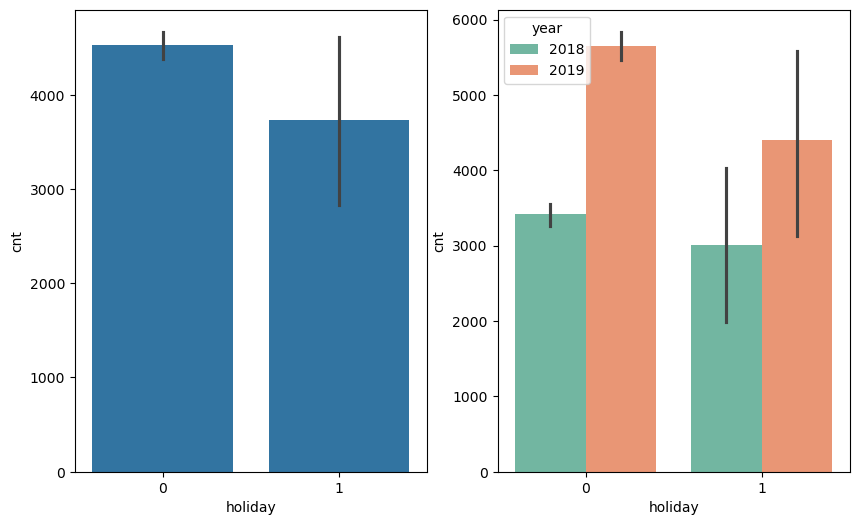

In [778]:
# plotting visualization for holiday column

cat_column_vis('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

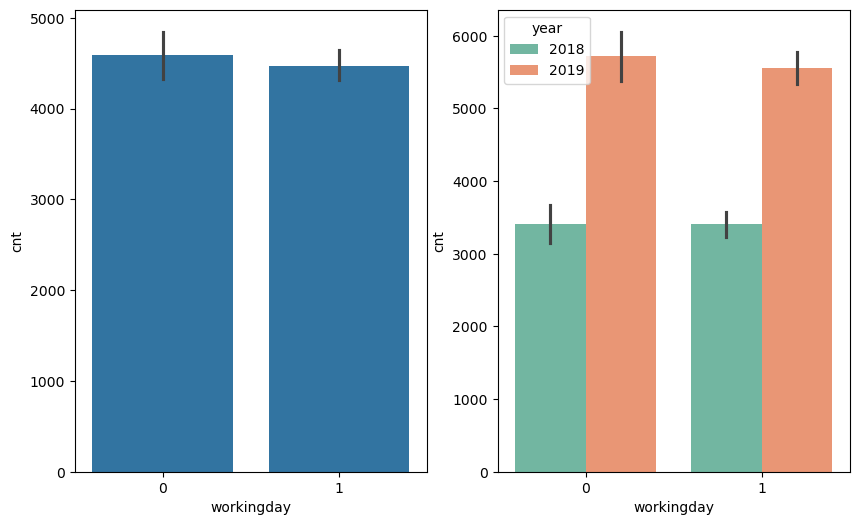

In [779]:
# plotting visualization for workingday column

cat_column_vis('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

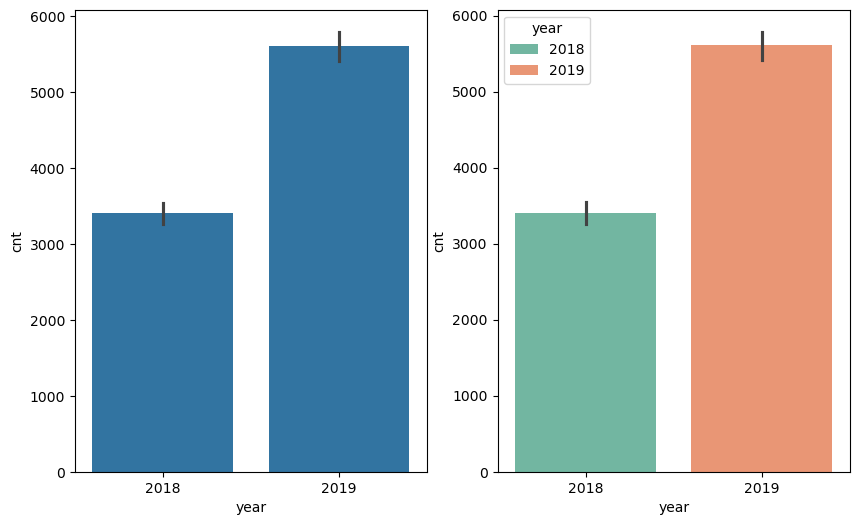

In [780]:
# plotting visualization for year column

cat_column_vis('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

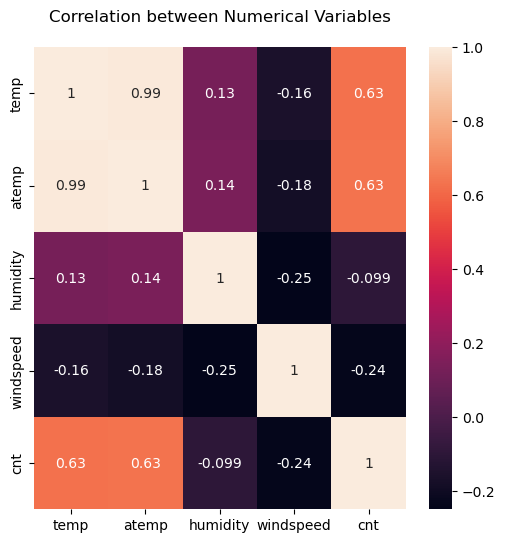

In [781]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True)
plt.title("Correlation between Numerical Variables\n")
plt.show()

## Step 3: Preparation Of Data

In [782]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months=pd.get_dummies(df.month,drop_first=True)
weekdays=pd.get_dummies(df.weekday,drop_first=True)
weathersit=pd.get_dummies(df.weathersit,drop_first=True)
seasons=pd.get_dummies(df.season,drop_first=True)

In [783]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,2018,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [784]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months,weekdays,weathersit,seasons],axis=1)

In [785]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist,Spring,Summer,Winter
0,Spring,2018,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,...,False,False,False,False,False,False,True,True,False,False
1,Spring,2018,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,...,False,False,False,True,False,False,True,True,False,False
2,Spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,True,False,False,True,False,False
3,Spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,False,False,True,False,False,False,False,True,False,False
4,Spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,True,False,False


In [786]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Aug         730 non-null    bool   
 13  Dec         730 non-null    bool   
 14  Feb         730 non-null    bool   
 15  Jan         730 non-null    bool   
 16  July        730 non-null    bool   
 17  June        730 non-null    bool   
 18  Mar         730 non-null    bool   
 19  May         730 non-null    b

In [787]:
# dropping columns for which we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [788]:
# check the shape of new dataframe

df_new.shape

(730, 30)

In [789]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Aug         730 non-null    bool   
 9   Dec         730 non-null    bool   
 10  Feb         730 non-null    bool   
 11  Jan         730 non-null    bool   
 12  July        730 non-null    bool   
 13  June        730 non-null    bool   
 14  Mar         730 non-null    bool   
 15  May         730 non-null    bool   
 16  Nov         730 non-null    bool   
 17  Oct         730 non-null    bool   
 18  Sep         730 non-null    bool   
 19  Mon         730 non-null    b

## Step 4: Splitting the Data into Training and Testing Sets

In [790]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.8, random_state = 90)

In [791]:
# check the shape of training datatset

df_train.shape

(584, 30)

In [792]:
# check the shape of testing datatset

df_test.shape

(146, 30)

In [793]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist,Spring,Summer,Winter
575,2019,0,1,29.964153,34.24935,66.8750,10.292339,7105,False,False,...,False,False,False,True,False,False,False,False,False,False
241,2018,0,1,26.205847,29.73520,54.8333,8.375536,5204,True,False,...,False,False,True,False,False,False,False,False,False,False
681,2019,0,1,14.076653,16.16125,66.2917,22.917082,4094,False,False,...,False,False,False,False,True,False,True,False,False,True
108,2018,0,1,20.739153,24.46290,66.5833,10.584057,3204,False,False,...,False,False,True,False,False,False,True,False,True,False
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,False,True,False,False


In [794]:
# Apply scaler() (MinMaxScaler) to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [795]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist,Spring,Summer,Winter
575,2019,0,1,0.836974,0.795348,0.612852,0.270528,0.814887,False,False,...,False,False,False,True,False,False,False,False,False,False
241,2018,0,1,0.722754,0.676840,0.459373,0.211549,0.596180,True,False,...,False,False,True,False,False,False,False,False,False,False
681,2019,0,1,0.354130,0.320487,0.605417,0.658984,0.468477,False,False,...,False,False,False,False,True,False,True,False,False,True
108,2018,0,1,0.556613,0.538428,0.609134,0.279504,0.366084,False,False,...,False,False,True,False,False,False,True,False,True,False
4,2018,0,1,0.209120,0.197158,0.317417,0.339143,0.181546,False,False,...,False,False,False,False,False,False,False,True,False,False


In [796]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,2018.494863,0.027397,0.690068,0.546914,0.523373,0.569557,0.339724,0.515896
std,0.500402,0.163378,0.462862,0.227359,0.212590,0.177747,0.154332,0.221855
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.354130,0.345255,0.432450,0.228222,0.366947
50%,2018.000000,0.000000,1.000000,0.555146,0.541346,0.571960,0.319885,0.517027
75%,2019.000000,0.000000,1.000000,0.743521,0.694671,0.695831,0.428191,0.675420
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


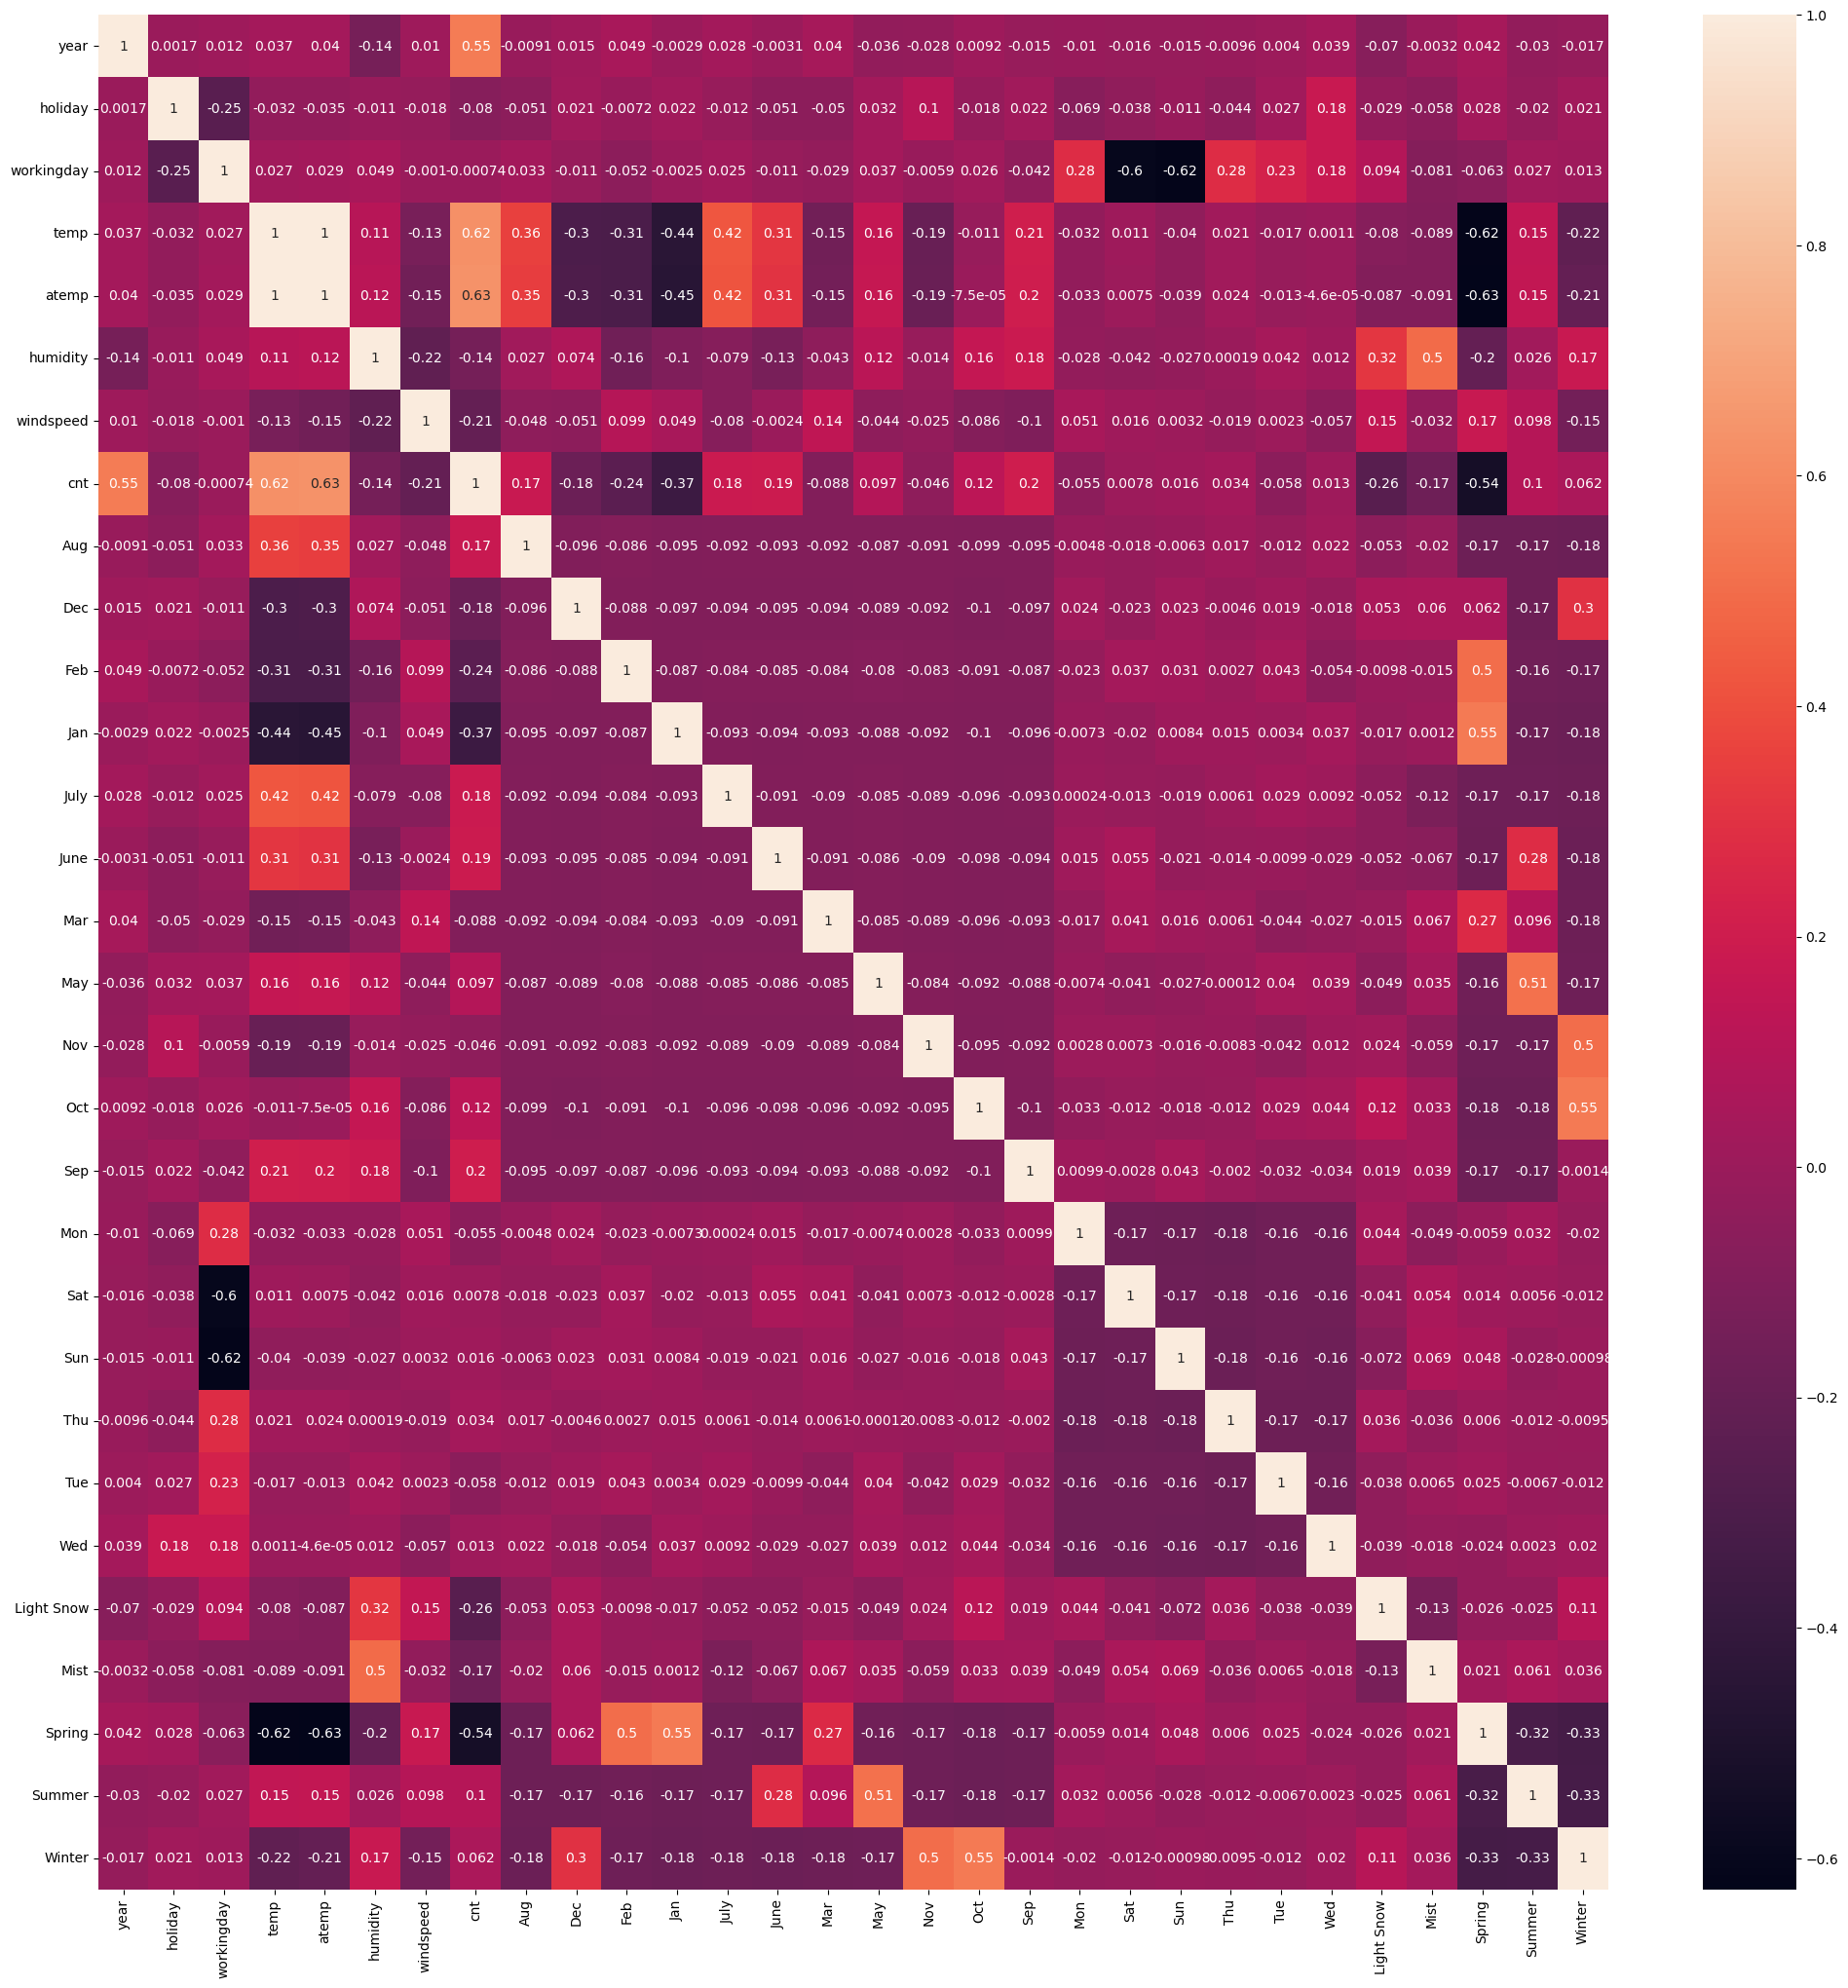

In [797]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

#### cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

In [798]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [799]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [800]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', False, 6),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 11),
 ('Dec', True, 1),
 ('Feb', False, 13),
 ('Jan', False, 12),
 ('July', True, 1),
 ('June', False, 10),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 4),
 ('Sat', False, 7),
 ('Sun', False, 14),
 ('Thu', False, 9),
 ('Tue', False, 3),
 ('Wed', False, 5),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 15),
 ('Winter', True, 1)]

In [801]:
# Common function to calculate VIF of variables

def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [802]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_rfe

,year,holiday,temp,humidity,windspeed,Dec,Jan,July,Nov,Sep,Light Snow,Mist,Spring,Summer,Winter
575,2019,0,0.836974,0.612852,0.270528,False,False,True,False,False,False,False,False,False,False
241,2018,0,0.722754,0.459373,0.211549,False,False,False,False,False,False,False,False,False,False
681,2019,0,0.354130,0.605417,0.658984,False,False,False,True,False,False,True,False,False,True
108,2018,0,0.556613,0.609134,0.279504,False,False,False,False,False,False,True,False,True,False
4,2018,0,0.209120,0.317417,0.339143,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2019,0,0.450699,0.600638,0.216686,False,False,False,True,False,False,False,False,False,True
323,2018,0,0.503656,0.633032,0.337184,False,False,False,True,False,False,True,False,False,True
671,2019,0,0.354130,0.386617,0.511548,False,False,False,True,False,False,True,False,False,True
626,2019,0,0.614763,0.444504,0.397433,False,False,False,False,True,False,False,False,False,False


In [803]:
# calculate VIF

VIF(X_train_rfe.astype(float))

,Features,VIF
0,year,74.99
2,temp,28.63
3,humidity,23.52
4,windspeed,7.07
12,Spring,6.75
14,Winter,4.72
13,Summer,3.46
11,Mist,2.58
8,Nov,1.83
6,Jan,1.79


humidity shows high VIF value.

## Step 5: Building a linear model

In [804]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
model1 = sm.OLS(y_train.astype(float),X_train_lm_1.astype(float)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     192.1
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          5.16e-211
Time:                        22:25:31   Log-Likelihood:                 577.93
No. Observations:                 584   AIC:                            -1124.
Df Residuals:                     568   BIC:                            -1054.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -467.5087     15.566    -30.034      0.000    -498.082    -436.935
year           0.2318      0.008     30.062      0.000       0.217       0.247
holiday       -0.0960      0.023     -4.099      0.000      -0.142      -0.050
temp           0.4400      0.034     12.818      0.000       0.373       0.507
humidity      -0.1577      0.031     -5.074      0.000      -0.219      -0.097
windspeed     -0.1464      0.027     -5.442      0.000      -0.199      -0.094
Dec           -0.0603      0.016     -3.719      0.000      -0.092      -0.028
Jan           -0.0293      0.017     -1.715      0.087      -0.063       0.004
July          -0.0565      0.017     -3.309      0.001      -0.090      -0.023
Nov           -0.0605      0.018     -3.360      0.001      -0.096      -0.025
Sep            0.0662      0.016      4.236      0.000       0.035       0.097
Light Snow    -0.2227      0.027     -8.258      0.000      -0.276      -0.170
Mist          -0.0508      0.010     -4.948      0.000      -0.071      -0.031
Spring        -0.1035      0.020     -5.166      0.000      -0.143      -0.064
Summer         0.0184      0.014      1.275      0.203      -0.010       0.047
Winter         0.0958      0.016      5.904      0.000       0.064       0.128
==============================================================================
Omnibus:                       87.862   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.072
Skew:                          -0.748   Prob(JB):                     7.40e-53
Kurtosis:                       5.762   Cond. No.                     8.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [805]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new.astype(float))

,Features,VIF
0,year,63.71
2,temp,27.62
11,Spring,6.74
3,windspeed,6.48
13,Winter,4.65
12,Summer,3.43
7,Nov,1.83
5,Jan,1.78
6,July,1.68
4,Dec,1.63


VIF values seems to be good now. But we will see if we can reduce further ?

In [806]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
model2 = sm.OLS(y_train.astype(float),X_train_lm_2.astype(float)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     195.5
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          1.00e-206
Time:                        22:25:31   Log-Likelihood:                 564.98
No. Observations:                 584   AIC:                            -1100.
Df Residuals:                     569   BIC:                            -1034.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -480.0626     15.699    -30.580      0.000    -510.897    -449.228
year           0.2380      0.008     30.599      0.000       0.223       0.253
holiday       -0.1006      0.024     -4.206      0.000      -0.148      -0.054
temp           0.4047      0.034     11.786      0.000       0.337       0.472
windspeed     -0.1071      0.026     -4.071      0.000      -0.159      -0.055
Dec           -0.0672      0.016     -4.076      0.000      -0.100      -0.035
Jan           -0.0356      0.017     -2.045      0.041      -0.070      -0.001
July          -0.0517      0.017     -2.966      0.003      -0.086      -0.017
Nov           -0.0619      0.018     -3.364      0.001      -0.098      -0.026
Sep            0.0553      0.016      3.495      0.001       0.024       0.086
Light Snow    -0.2913      0.024    -12.226      0.000      -0.338      -0.244
Mist          -0.0826      0.008     -9.927      0.000      -0.099      -0.066
Spring        -0.1084      0.020     -5.306      0.000      -0.149      -0.068
Summer         0.0120      0.015      0.816      0.415      -0.017       0.041
Winter         0.0847      0.016      5.159      0.000       0.052       0.117
==============================================================================
Omnibus:                       89.150   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.504
Skew:                          -0.758   Prob(JB):                     8.07e-54
Kurtosis:                       5.784   Cond. No.                     8.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [807]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['Nov'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new.astype(float))

,Features,VIF
0,year,58.80
2,temp,25.28
3,windspeed,6.48
10,Spring,6.47
12,Winter,4.44
11,Summer,3.33
5,Jan,1.75
6,July,1.68
9,Mist,1.62
7,Sep,1.43


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [808]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
model3 = sm.OLS(y_train.astype(float),X_train_lm_3.astype(float)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     205.9
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          1.81e-205
Time:                        22:25:32   Log-Likelihood:                 559.23
No. Observations:                 584   AIC:                            -1090.
Df Residuals:                     570   BIC:                            -1029.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -480.0408     15.840    -30.305      0.000    -511.153    -448.929
year           0.2380      0.008     30.323      0.000       0.223       0.253
holiday       -0.1107      0.024     -4.624      0.000      -0.158      -0.064
temp           0.4382      0.033     13.214      0.000       0.373       0.503
windspeed     -0.1096      0.027     -4.130      0.000      -0.162      -0.057
Dec           -0.0461      0.015     -2.995      0.003      -0.076      -0.016
Jan           -0.0276      0.017     -1.584      0.114      -0.062       0.007
July          -0.0514      0.018     -2.925      0.004      -0.086      -0.017
Sep            0.0636      0.016      4.036      0.000       0.033       0.095
Light Snow    -0.2863      0.024    -11.932      0.000      -0.333      -0.239
Mist          -0.0803      0.008     -9.603      0.000      -0.097      -0.064
Spring        -0.0947      0.020     -4.688      0.000      -0.134      -0.055
Summer         0.0205      0.015      1.410      0.159      -0.008       0.049
Winter         0.0729      0.016      4.504      0.000       0.041       0.105
==============================================================================
Omnibus:                       78.660   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.118
Skew:                          -0.710   Prob(JB):                     3.16e-42
Kurtosis:                       5.417   Cond. No.                     8.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [809]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['Dec'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new.astype(float))

,Features,VIF
0,year,54.98
2,temp,23.55
3,windspeed,6.45
9,Spring,6.44
11,Winter,4.43
10,Summer,3.27
5,July,1.68
4,Jan,1.66
8,Mist,1.62
6,Sep,1.42


In [810]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
model4 = sm.OLS(y_train.astype(float),X_train_lm_4.astype(float)).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          1.01e-204
Time:                        22:25:32   Log-Likelihood:                 554.67
No. Observations:                 584   AIC:                            -1083.
Df Residuals:                     571   BIC:                            -1027.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -478.3732     15.940    -30.010      0.000    -509.682    -447.064
year           0.2372      0.008     30.027      0.000       0.222       0.253
holiday       -0.1119      0.024     -4.644      0.000      -0.159      -0.065
temp           0.4643      0.032     14.415      0.000       0.401       0.528
windspeed     -0.1044      0.027     -3.915      0.000      -0.157      -0.052
Jan           -0.0156      0.017     -0.916      0.360      -0.049       0.018
July          -0.0524      0.018     -2.963      0.003      -0.087      -0.018
Sep            0.0676      0.016      4.279      0.000       0.037       0.099
Light Snow    -0.2879      0.024    -11.918      0.000      -0.335      -0.240
Mist          -0.0814      0.008     -9.677      0.000      -0.098      -0.065
Spring        -0.0909      0.020     -4.475      0.000      -0.131      -0.051
Summer         0.0262      0.015      1.806      0.071      -0.002       0.055
Winter         0.0717      0.016      4.402      0.000       0.040       0.104
==============================================================================
Omnibus:                       71.845   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.608
Skew:                          -0.675   Prob(JB):                     4.90e-36
Kurtosis:                       5.205   Cond. No.                     8.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [811]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['Jan'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new.astype(float))

,Features,VIF
0,year,52.37
2,temp,22.32
3,windspeed,6.42
8,Spring,6.32
10,Winter,4.34
9,Summer,3.25
4,July,1.67
7,Mist,1.62
5,Sep,1.42
6,Light Snow,1.10


In [812]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
model5 = sm.OLS(y_train.astype(float),X_train_lm_5.astype(float)).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     239.2
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          9.65e-206
Time:                        22:25:32   Log-Likelihood:                 554.24
No. Observations:                 584   AIC:                            -1084.
Df Residuals:                     572   BIC:                            -1032.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -478.5286     15.937    -30.026      0.000    -509.831    -447.226
year           0.2372      0.008     30.042      0.000       0.222       0.253
holiday       -0.1121      0.024     -4.650      0.000      -0.159      -0.065
temp           0.4711      0.031     15.019      0.000       0.409       0.533
windspeed     -0.1028      0.027     -3.864      0.000      -0.155      -0.051
July          -0.0530      0.018     -2.997      0.003      -0.088      -0.018
Sep            0.0676      0.016      4.278      0.000       0.037       0.099
Light Snow    -0.2876      0.024    -11.908      0.000      -0.335      -0.240
Mist          -0.0812      0.008     -9.659      0.000      -0.098      -0.065
Spring        -0.0934      0.020     -4.647      0.000      -0.133      -0.054
Summer         0.0273      0.014      1.883      0.060      -0.001       0.056
Winter         0.0738      0.016      4.578      0.000       0.042       0.106
==============================================================================
Omnibus:                       71.286   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.017
Skew:                          -0.670   Prob(JB):                     1.09e-35
Kurtosis:                       5.195   Cond. No.                     8.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [813]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['July'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new.astype(float))

,Features,VIF
0,year,51.78
2,temp,21.73
3,windspeed,6.41
7,Spring,6.06
9,Winter,4.00
8,Summer,2.76
6,Mist,1.62
4,Sep,1.28
5,Light Snow,1.10
1,holiday,1.04


VIF value now seems to be good as it came below 5.

In [814]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
model6 = sm.OLS(y_train.astype(float),X_train_lm_6.astype(float)).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     258.6
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          4.96e-205
Time:                        22:25:32   Log-Likelihood:                 549.69
No. Observations:                 584   AIC:                            -1077.
Df Residuals:                     573   BIC:                            -1029.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -478.0949     16.047    -29.793      0.000    -509.613    -446.576
year           0.2370      0.008     29.809      0.000       0.221       0.253
holiday       -0.1128      0.024     -4.650      0.000      -0.161      -0.065
temp           0.4559      0.031     14.627      0.000       0.395       0.517
windspeed     -0.1000      0.027     -3.734      0.000      -0.153      -0.047
Sep            0.0827      0.015      5.483      0.000       0.053       0.112
Light Snow    -0.2873      0.024    -11.813      0.000      -0.335      -0.239
Mist          -0.0803      0.008     -9.485      0.000      -0.097      -0.064
Spring        -0.0812      0.020     -4.096      0.000      -0.120      -0.042
Summer         0.0442      0.013      3.291      0.001       0.018       0.071
Winter         0.0875      0.016      5.612      0.000       0.057       0.118
==============================================================================
Omnibus:                       75.104   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.368
Skew:                          -0.710   Prob(JB):                     7.47e-37
Kurtosis:                       5.196   Cond. No.                     8.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### We can cosider the above model i.e model6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

In [815]:
# Checking the parameters and their coefficient values
model6.params

const        -478.094868
year            0.237015
holiday        -0.112837
temp            0.455882
windspeed      -0.099998
Sep             0.082705
Light Snow     -0.287252
Mist           -0.080271
Spring         -0.081200
Summer          0.044205
Winter          0.087471
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [816]:
y_train_pred = model6.predict(X_train_lm_6.astype(float))

#### Normality of error terms

Text(0.5, 0, 'Errors')

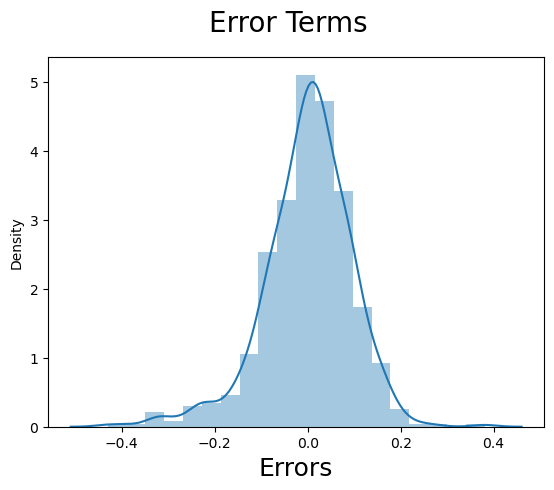

In [817]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

#### Multi Colinearity

In [818]:
VIF(X_train_new.astype(float))

,Features,VIF
0,year,51.78
2,temp,21.73
3,windspeed,6.41
7,Spring,6.06
9,Winter,4.00
8,Summer,2.76
6,Mist,1.62
4,Sep,1.28
5,Light Snow,1.10
1,holiday,1.04


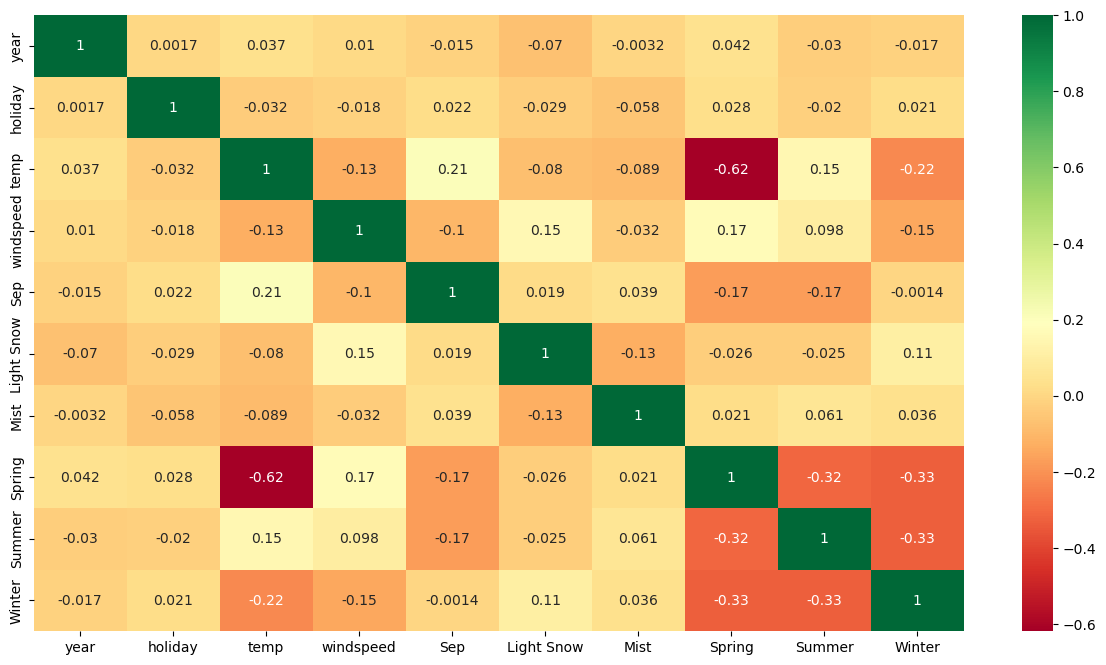

In [819]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### Linearity 

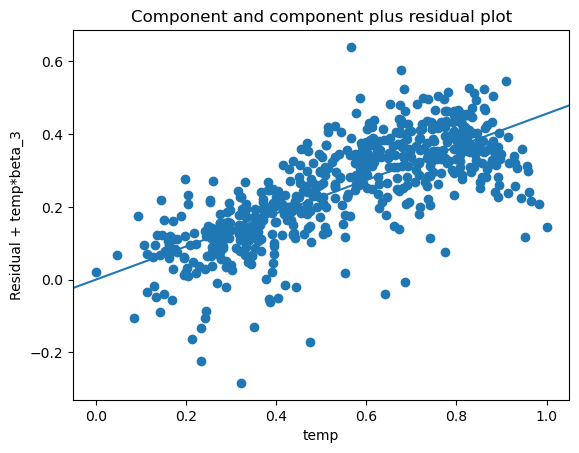

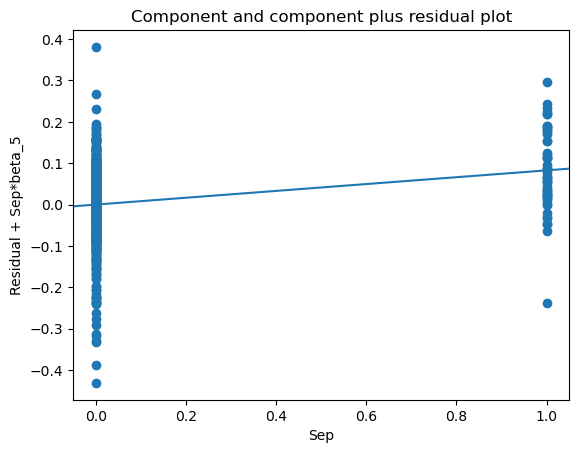

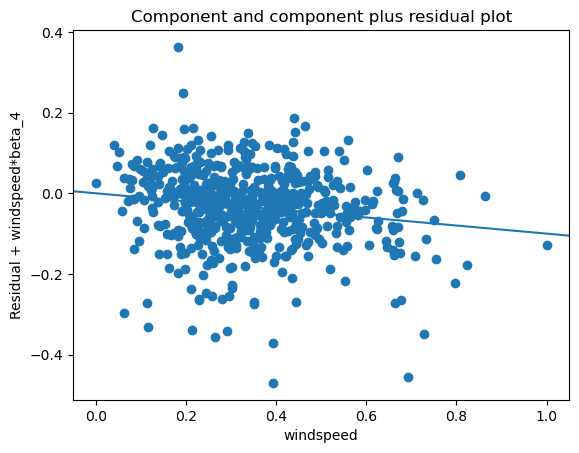

In [820]:
# Linear relationship validation using CCPR plot

sm.graphics.plot_ccpr(model6, 'temp')
plt.show()

sm.graphics.plot_ccpr(model6, 'Sep')
plt.show()

sm.graphics.plot_ccpr(model6, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

#### Homoscedasticity

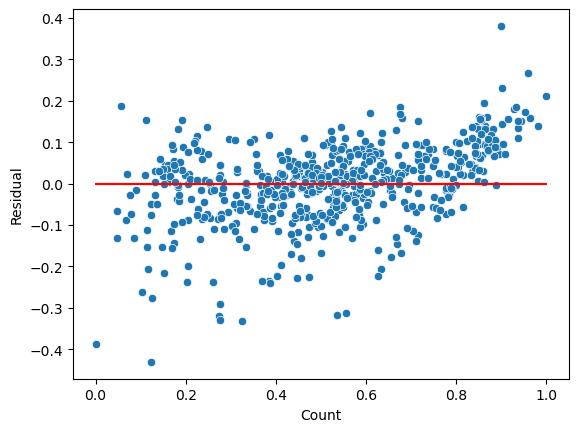

In [821]:
y_train_pred = model6.predict(X_train_lm_6.astype(float))
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [822]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist,Spring,Summer,Winter
702,2019,0,1,0.519232,0.511907,0.695698,0.312814,0.757478,False,True,...,False,False,False,False,True,False,False,False,False,True
201,2018,0,0,0.941851,0.980934,0.641529,0.411546,0.432812,False,False,...,True,False,False,False,False,False,True,False,False,False
473,2019,0,1,0.547268,0.543400,0.541158,0.089755,0.752761,False,False,...,False,False,False,False,False,False,False,False,True,False
294,2018,0,1,0.452776,0.454726,0.562401,0.144876,0.493097,False,False,...,False,False,False,False,False,False,False,False,False,True
547,2019,0,1,0.900316,0.817730,0.330323,0.356392,0.713875,False,False,...,False,False,False,True,False,False,False,False,False,False


In [823]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,2018.520548,0.034247,0.691781,0.531604,0.501961,0.524121,0.373944,0.516954
std,0.501297,0.182488,0.463347,0.231625,0.219297,0.192008,0.178303,0.226989
min,2018.000000,0.000000,0.000000,0.046591,0.025950,-0.239512,0.047450,0.069144
25%,2018.000000,0.000000,0.000000,0.327133,0.315107,0.392193,0.244232,0.349229
50%,2019.000000,0.000000,1.000000,0.519751,0.509405,0.513807,0.349323,0.525541
75%,2019.000000,0.000000,1.000000,0.734175,0.695906,0.650159,0.475921,0.709532
max,2019.000000,1.000000,1.000000,0.984424,0.980934,0.958022,0.824380,0.918891


In [824]:
y_test = df_test.pop('cnt')
X_test = df_test

In [825]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [826]:
y_pred = model6.predict(X_test_lm_6.astype(float))

In [827]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8477

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [828]:
round(model6.params,4)

const        -478.0949
year            0.2370
holiday        -0.1128
temp            0.4559
windspeed      -0.1000
Sep             0.0827
Light Snow     -0.2873
Mist           -0.0803
Spring         -0.0812
Summer          0.0442
Winter          0.0875
dtype: float64

In [829]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8364


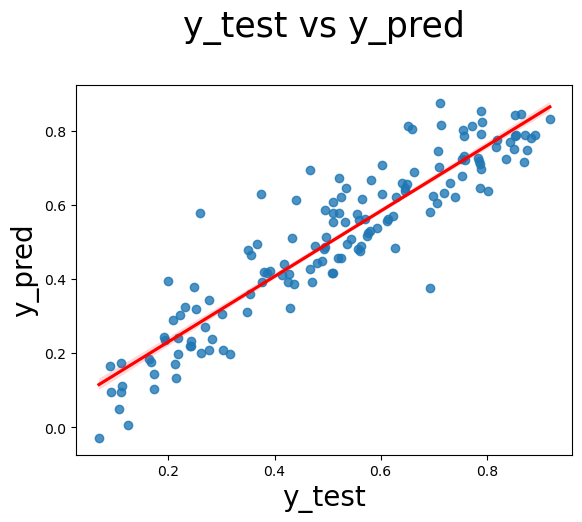

In [830]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test.astype(float), y=y_pred.astype(float), ci=68, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred\n', fontsize=25)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=20)
plt.show()

# Comparision between Training and Testing dataset:
#### Train dataset R^2          : 0.819
#### Test dataset R^2           : 0.8477
#### Train dataset Adjusted R^2 : 0.815    
#### Test dataset Adjusted R^2  : 0.8364
